In [13]:
import cv2
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import pytesseract
from pytesseract import Output
import re
%matplotlib inline



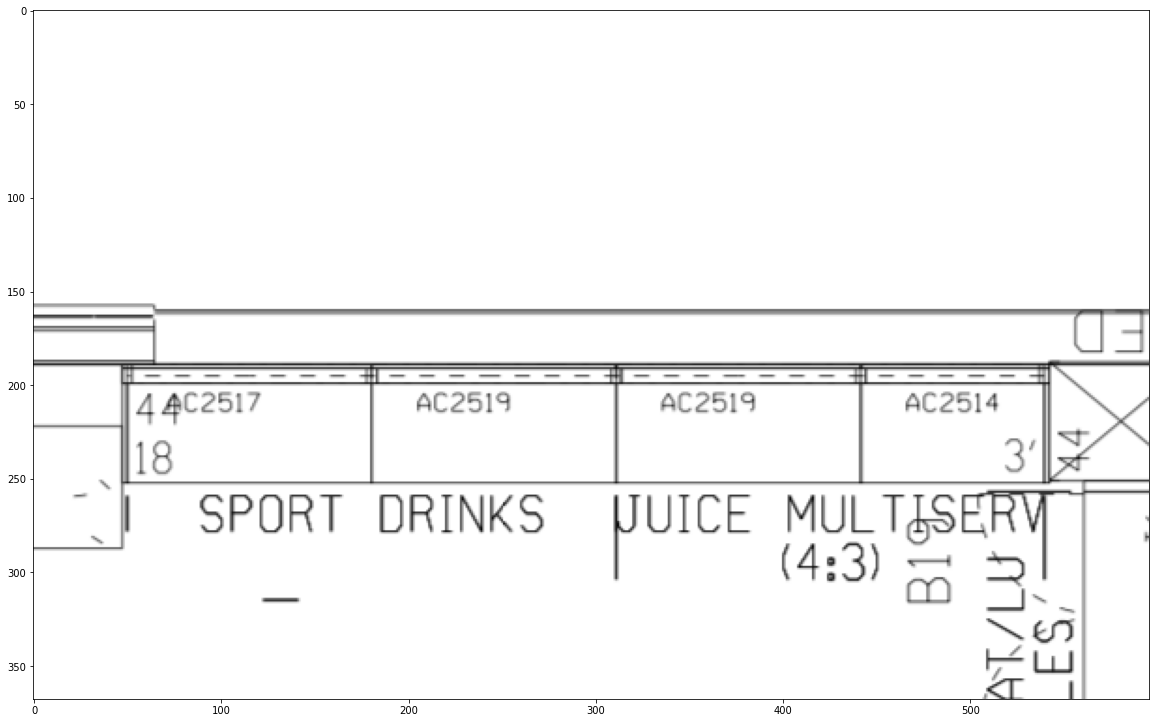

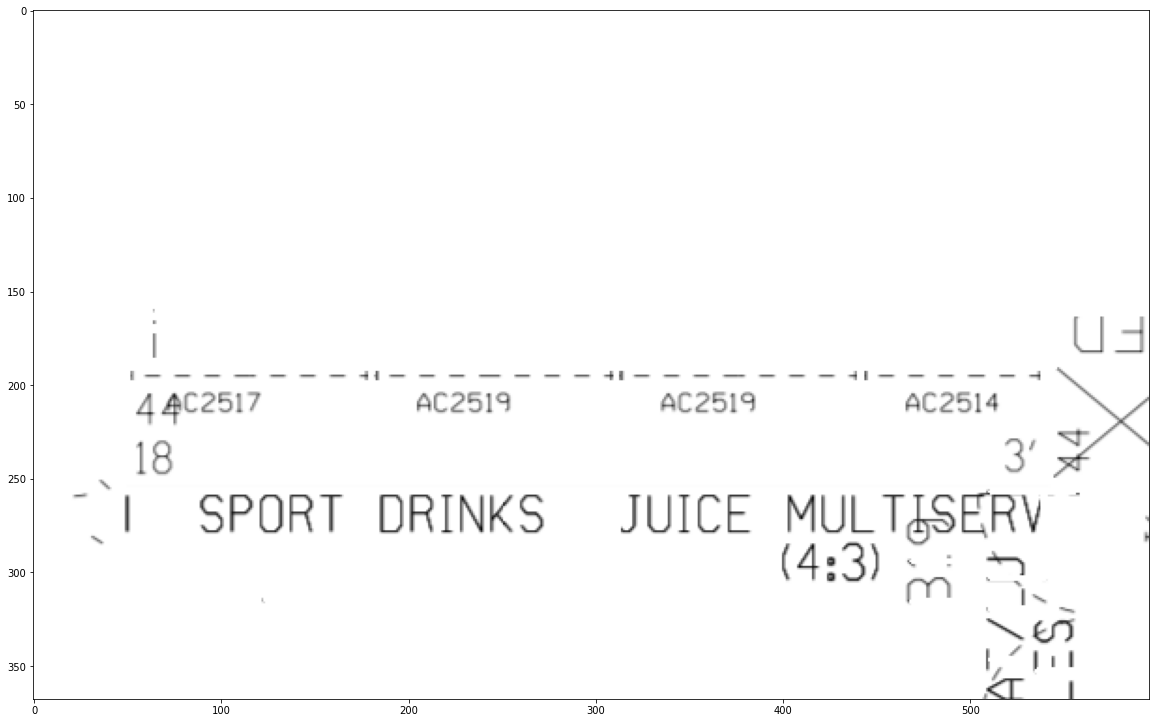

In [14]:
def display_img(image):
    fig = plt.figure(figsize=(20,16))
    ax = fig.add_subplot(111)
    ax.imshow(image, cmap="gray")
    
image = cv2.imread('b19.jpeg')
display_img(image)
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove horizontal
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,1))
detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(image, [c], -1, (255,255,255), 2)

# Remove vertical
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,15))
detected_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(detected_lines, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(image, [c], -1, (255,255,255), 2)
    

cv2.imwrite('b19.png', image)
display_img(image)

In [15]:
image = cv2.imread('b19.png')
d = pytesseract.image_to_data(image, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


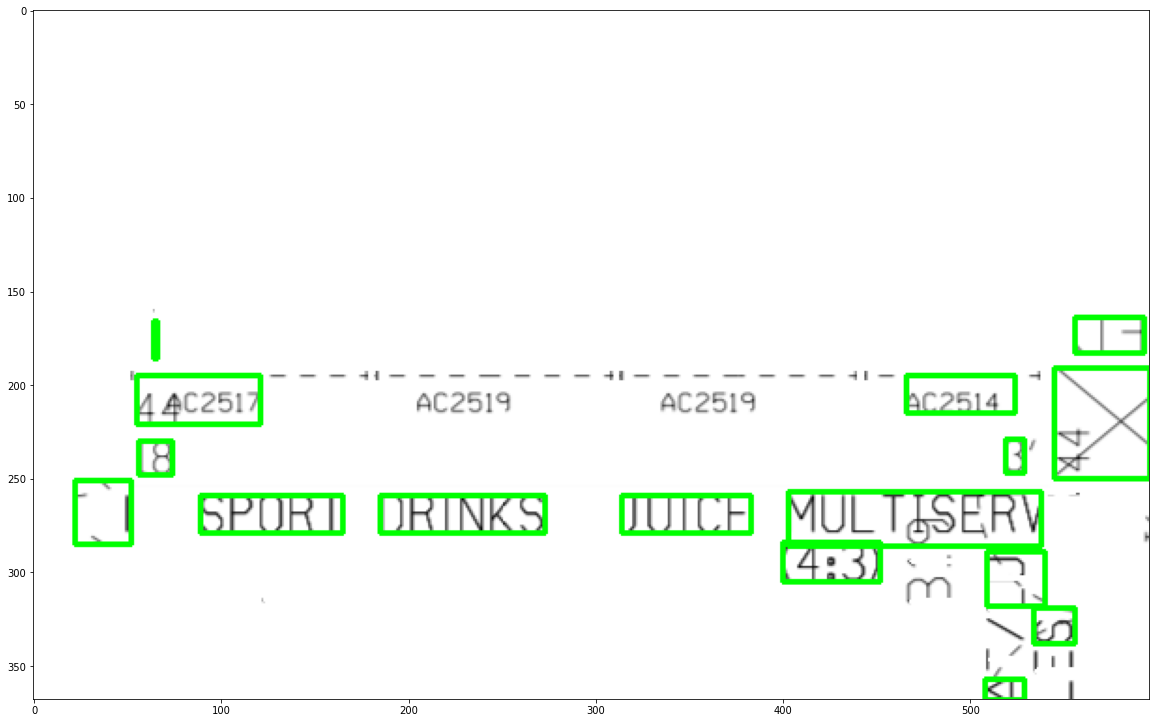

In [16]:
n_boxes = len(d['text'])
lst = []
for i in range(n_boxes):
    if int(d['conf'][i]) > 10:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        lst.append(d['text'][i])
        
display_img(image)

In [17]:
print(lst)

['i', 'Ua', '4acesi7', 'I', 'x', '18', '3', 'oy', 'SPORT', 'DRINKS', 'JUICE', 'MULT§SERV', '(4:3)', '2.', 'S/', 'aT']
